# 1. Summary Statistics

Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.


# Mean and median

In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

pandas is imported as pd for you and food_consumption is pre-loaded.

# Instructions:

- Import numpy with the alias np.
Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [6]:
# Import numpy with alias np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('food_consumption.csv', index_col = 0)

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


- Subset food_consumption for rows with data about Belgium and the USA.
Group the subsetted data by country and select only the consumption column.
Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [7]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


# Mean vs. median

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

pandas is loaded as pd, numpy is loaded as np, and food_consumption is available.

# Instructions:

- Import matplotlib.pyplot with the alias plt.
- Subset food_consumption to get the rows where food_category is 'rice'.
- Create a histogram of co2_emission for rice and show the plot.

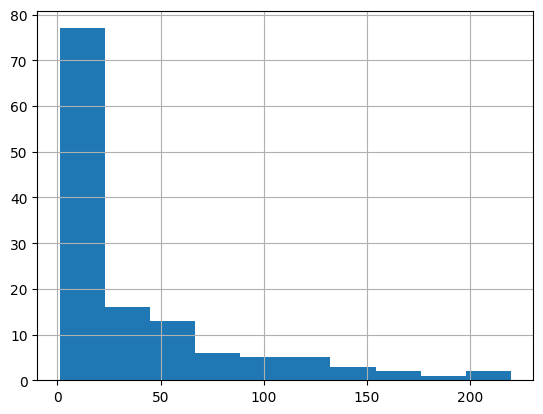

In [8]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption.co2_emission.hist()
plt.show()

# Question:

Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

Possible answers:

( ) No skew

( ) Left-skewed

(x) Right-skewed

- Use .agg() to calculate the mean and median of co2_emission for rice.

In [9]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg([np.mean, np.median]))

        consumption  co2_emission
mean      29.375154     37.591615
median    11.875000     15.200000


/tmp/ipykernel_2488/2351920242.py:5: FutureWarning: ['country', 'food_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(rice_consumption.agg([np.mean, np.median]))


# Question

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

Possible answers

( ) Mean

(x) Median

( ) Both mean and median

# Quartiles, quantiles, and quintiles

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

Both pandas as pd and numpy as np are loaded and food_consumption is available.

# Instructions:

- Calculate the quartiles of the co2_emission column of food_consumption.

In [10]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 5)))

[   0.        5.21     16.53     62.5975 1712.    ]


- Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.

In [11]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


- Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

In [12]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


# Variance and standard deviation

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both pandas as pd and numpy as np are loaded, and food_consumption is available.

# Instructions:

- Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.
- Import matplotlib.pyplot with alias plt.
- Create a histogram of co2_emission for the beef food_category and show the plot.
- Create a histogram of co2_emission for the eggs food_category and show the plot.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


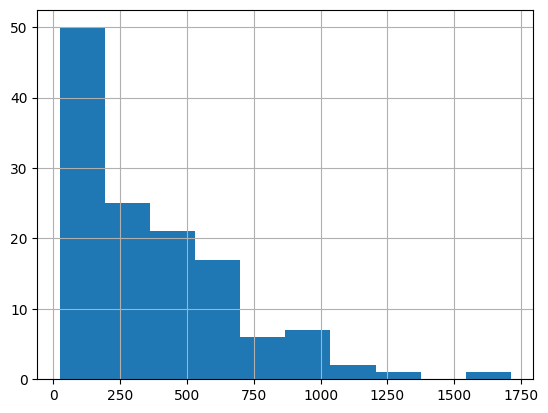

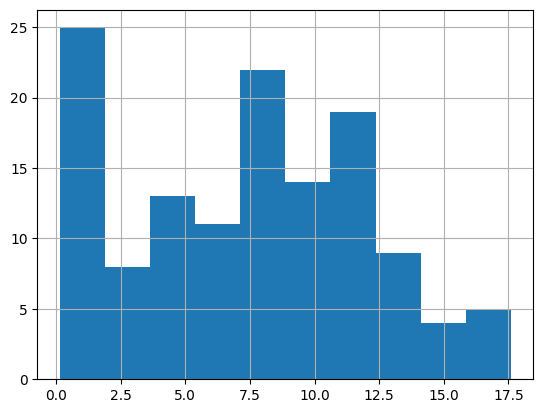

In [13]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()

# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()

# Show plot
plt.show()

# Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than 
 or greater than 
, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

Diagram of a box plot showing median, quartiles, and outliers

In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and food_consumption is available.

# Instructions:

- Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


# Instructions:

- Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
- Calculate the interquartile range of emissions_by_country and store it as iqr.

In [15]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

- Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

In [16]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

- Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [17]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country > upper) | (emissions_by_country < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
